In [ ]:
Pyt

In [ ]:
import pandas as pd
import numpy as np
from numpy import NaN
from scipy import stats
import statistics
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from scipy import linalg
from sklearn.decomposition import FastICA, PCA
from mpl_toolkits.mplot3d import Axes3D

# the following lines must be uncommented if you want to have interactive plots
%matplotlib inline  
%matplotlib notebook
%pylab

In [2]:
# reading WT vs mutant dataset
WTvsMUT_bundle = pd.read_csv('WTvsMutLog2FC.txt',sep='\t',index_col='gene')

# getting rid of not needed columns and zero rows
WT_data =  WTvsMUT_bundle.filter(regex='B6_\d+ng_B6_NT1')
mut_data = WTvsMUT_bundle.filter(regex='1h_\d+ng_1h_NT1')
WTvsMUT_all = pd.concat([WT_data,mut_data],axis=1).fillna(0)

# getting rid of all-zero rows
WTvsMUT = WTvsMUT_all[(WTvsMUT_all.T != 0).any()]


# let's see what we have
WTvsMUT

,B6_2ng_B6_NT1,B6_10ng_B6_NT1,B6_50ng_B6_NT1,1h_2ng_1h_NT1,1h_10ng_1h_NT1,1h_50ng_1h_NT1
gene,,,,,,
Gsta3,2.798340,3.42470,3.255930,2.647470,3.201720,2.537300
Cd28,-1.389800,-3.52847,-4.290400,-1.521790,-4.016830,0.000000
Stk36,-2.133620,0.00000,0.000000,0.000000,0.000000,0.000000
Ramp1,-1.499170,-3.76724,-5.367170,-2.150380,-4.725410,0.000000
Serpinb12,2.266460,2.57571,2.215400,0.000000,2.259490,0.000000
Tnfsf4,2.607320,3.87224,6.550920,2.713020,5.556300,6.288090
Fcgr4,-1.050890,0.00000,0.000000,-0.875810,1.654800,1.172200
Slamf9,0.835011,2.35234,3.502040,0.881447,2.806460,2.992860
Tagln2,0.880628,1.16298,1.068210,0.000000,0.000000,0.000000


In [3]:
# running PCA
pca = PCA(n_components=3)
Spca = pca.fit_transform(WTvsMUT.transpose())
#PCAweights = pca.components_.transpose()
print("Explained variances by components: ", pca.explained_variance_ratio_, "total variance explained: ",sum(pca.explained_variance_ratio_))
PCA_WTvsMUT = pd.DataFrame(Spca,columns=['PC1','PC2','PC3'],index=WTvsMUT.columns)
PCA_WTvsMUT

Explained variances by components:  [0.56593421 0.18295973 0.1563747 ] total variance explained:  0.9052686487477092


,PC1,PC2,PC3
B6_2ng_B6_NT1,-50.415666,-24.249167,-1.027338
B6_10ng_B6_NT1,6.631894,0.237829,-33.851685
B6_50ng_B6_NT1,80.938935,-27.596320,8.315959
1h_2ng_1h_NT1,-46.858920,-12.983216,5.174632
1h_10ng_1h_NT1,11.065471,39.355359,-18.409268
1h_50ng_1h_NT1,-1.361713,25.235514,39.797700


<IPython.core.display.Javascript object>


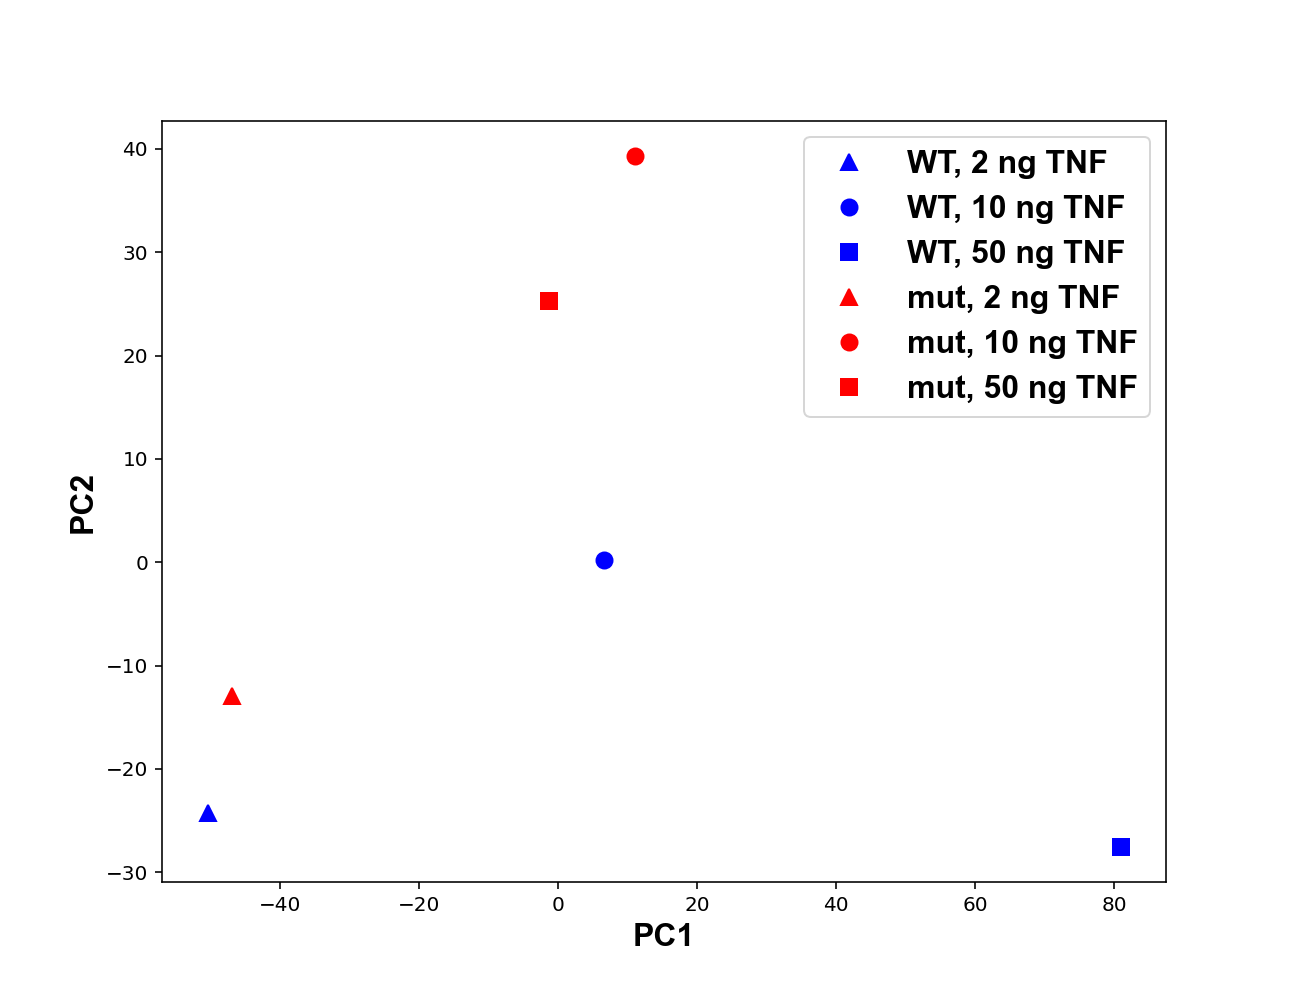

In [4]:
# plotting PCA

fig = plt.figure(figsize=(9,7))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'normal', 'size' : 12} 
plt.rc('font', **fontAxes)

ax.plot(PCA_WTvsMUT.filter(regex='B6_2ng',axis=0).iloc[:,0],PCA_WTvsMUT.filter(regex='B6_2ng',axis=0).iloc[:,1],'^',color='blue',label='WT, 2 ng TNF',ms=8) 
ax.plot(PCA_WTvsMUT.filter(regex='B6_10ng',axis=0).iloc[:,0],PCA_WTvsMUT.filter(regex='B6_10ng',axis=0).iloc[:,1],'o',color='blue',label='WT, 10 ng TNF',ms=8) 
ax.plot(PCA_WTvsMUT.filter(regex='B6_50ng',axis=0).iloc[:,0],PCA_WTvsMUT.filter(regex='B6_50ng',axis=0).iloc[:,1],'s',color='blue',label='WT, 50 ng TNF',ms=8) 

ax.plot(PCA_WTvsMUT.filter(regex='1h_2ng',axis=0).iloc[:,0],PCA_WTvsMUT.filter(regex='1h_2ng',axis=0).iloc[:,1],'^',color='red',label='mut, 2 ng TNF',ms=8) 
ax.plot(PCA_WTvsMUT.filter(regex='1h_10ng',axis=0).iloc[:,0],PCA_WTvsMUT.filter(regex='1h_10ng',axis=0).iloc[:,1],'o',color='red',label='mut, 10 ng TNF',ms=8) 
ax.plot(PCA_WTvsMUT.filter(regex='1h_50ng',axis=0).iloc[:,0],PCA_WTvsMUT.filter(regex='1h_50ng',axis=0).iloc[:,1],'s',color='red',label='mut, 50 ng TNF',ms=8) 

ax.set_xlabel('PC1',**fontLabel)
ax.set_ylabel('PC2',**fontLabel)
#ax.set_zlabel('PC3',**fontLabel)

ax.legend(numpoints=1,prop=fontLabel)
plt.show()

# we can see clear separation

In [10]:
# now let's read perturbations dataset
pert_ds = pd.read_csv('log2_FCs_groups.csv').set_index("gene").fillna(0)

pert_ds

,T_log2FC,M_log2FC,TM_log2FC,TMR_log2FC,TMI_log2FC,TMRI_log2FC,TM_b_log2FC,TMR_b_log2FC,TMS_log2FC,TMH_log2FC,TMRS_log2FC,TMRH_log2FC
gene,,,,,,,,,,,,
Ctsb,-0.014885,-0.115274,-0.068934,-1.050292,-0.100044,-0.971395,-0.191295,-1.077779,-0.128975,-0.115700,-1.070173,-1.082191
Psap,-0.036963,-0.118388,-0.120603,-0.959054,-0.247972,-1.006567,-0.254524,-0.852353,-0.152566,-0.161025,-0.862245,-0.950101
Lyz2,-0.084709,-0.130142,-0.163158,-1.146662,-0.232578,-1.135095,-0.425141,-1.003331,-0.316878,-0.436525,-0.978543,-0.924567
Fth1,0.497784,0.162996,0.463710,-0.636149,0.361985,-0.532968,0.302967,-0.640272,0.354071,0.602465,-0.634743,-0.652486
Gpnmb,0.393545,0.195411,0.409642,-1.018442,0.352546,-0.875751,0.474504,-0.796657,0.536917,0.801052,-0.827811,-0.769782
Ctsd,0.341880,-0.020831,0.317567,-0.084967,0.239363,0.060850,0.229568,-0.089527,0.282589,0.326038,-0.088226,-0.142672
mt.Co1,-0.082938,-0.213827,-0.168573,-0.370624,-0.057545,-0.343662,-0.091670,-0.420540,0.080627,0.253288,-0.477224,-0.424048
Eef1a1,0.300484,0.110331,0.272163,0.165763,0.183615,0.137307,0.393095,0.190181,0.483909,0.487654,0.130278,0.103798
Selenop,-0.268898,-0.320938,-0.449160,-2.995409,-0.462584,-3.142166,-1.028045,-3.043043,-0.879016,-1.217882,-3.000104,-3.048558


In [11]:
# since samples S1-S21 and J1-J18 were measures at separate days, we need to adjust the J1-J18 data
# the idea is to re-normalize all J1-J18 samples so that TM_b group becomes equal to TM group
# this means that we have to add log-fold-changes of TM and subtract log-fold-changes of TM_b group to each data in J1-J18
normalize_groups = ['TM_b_log2FC','TMR_b_log2FC','TMS_log2FC','TMH_log2FC','TMRS_log2FC','TMRH_log2FC']
norm_column = pert_ds['TM_log2FC'].sub(pert_ds['TM_b_log2FC'])

for p_group in normalize_groups:
    pert_ds[p_group]=pert_ds[p_group].add(norm_column)

pert_ds

,T_log2FC,M_log2FC,TM_log2FC,TMR_log2FC,TMI_log2FC,TMRI_log2FC,TM_b_log2FC,TMR_b_log2FC,TMS_log2FC,TMH_log2FC,TMRS_log2FC,TMRH_log2FC
gene,,,,,,,,,,,,
Ctsb,-0.014885,-0.115274,-0.068934,-1.050292,-0.100044,-0.971395,-0.068934,-0.955419,-0.006615,0.006660,-0.947813,-0.959831
Psap,-0.036963,-0.118388,-0.120603,-0.959054,-0.247972,-1.006567,-0.120603,-0.718433,-0.018646,-0.027105,-0.728325,-0.816181
Lyz2,-0.084709,-0.130142,-0.163158,-1.146662,-0.232578,-1.135095,-0.163158,-0.741348,-0.054895,-0.174542,-0.716560,-0.662584
Fth1,0.497784,0.162996,0.463710,-0.636149,0.361985,-0.532968,0.463710,-0.479529,0.514814,0.763208,-0.474000,-0.491744
Gpnmb,0.393545,0.195411,0.409642,-1.018442,0.352546,-0.875751,0.409642,-0.861518,0.472056,0.736190,-0.892672,-0.834644
Ctsd,0.341880,-0.020831,0.317567,-0.084967,0.239363,0.060850,0.317567,-0.001527,0.370588,0.414037,-0.000226,-0.054672
mt.Co1,-0.082938,-0.213827,-0.168573,-0.370624,-0.057545,-0.343662,-0.168573,-0.497443,0.003725,0.176385,-0.554127,-0.500951
Eef1a1,0.300484,0.110331,0.272163,0.165763,0.183615,0.137307,0.272163,0.069249,0.362977,0.366721,0.009345,-0.017134
Selenop,-0.268898,-0.320938,-0.449160,-2.995409,-0.462584,-3.142166,-0.449160,-2.464158,-0.300131,-0.638997,-2.421219,-2.469673


In [12]:
# running PCA
pca = PCA(n_components=3)
Spca = pca.fit_transform(pert_ds.transpose())
#PCAweights = pca.components_.transpose()
print("Explained variances by components: ", pca.explained_variance_ratio_, "total variance explained: ",sum(pca.explained_variance_ratio_))
PCA_pert = pd.DataFrame(Spca,columns=['PC1','PC2','PC3'],index=pert_ds.columns)
PCA_pert

Explained variances by components:  [0.31457438 0.27020947 0.07582343] total variance explained:  0.660607281648317


,PC1,PC2,PC3
T_log2FC,-100.747350,4.703368,18.855499
M_log2FC,-101.326760,-6.394149,-56.597728
TM_log2FC,-31.087953,-58.434694,-5.341148
TMR_log2FC,-7.120370,120.687444,-3.219591
TMI_log2FC,-92.310785,-5.754048,-18.446225
TMRI_log2FC,-5.748000,144.627025,53.605443
TM_b_log2FC,-31.087953,-58.434694,-5.341148
TMR_b_log2FC,106.747761,6.591772,-22.415672
TMS_log2FC,25.598791,-87.394954,32.161086
TMH_log2FC,34.063455,-73.852945,70.546832


<IPython.core.display.Javascript object>


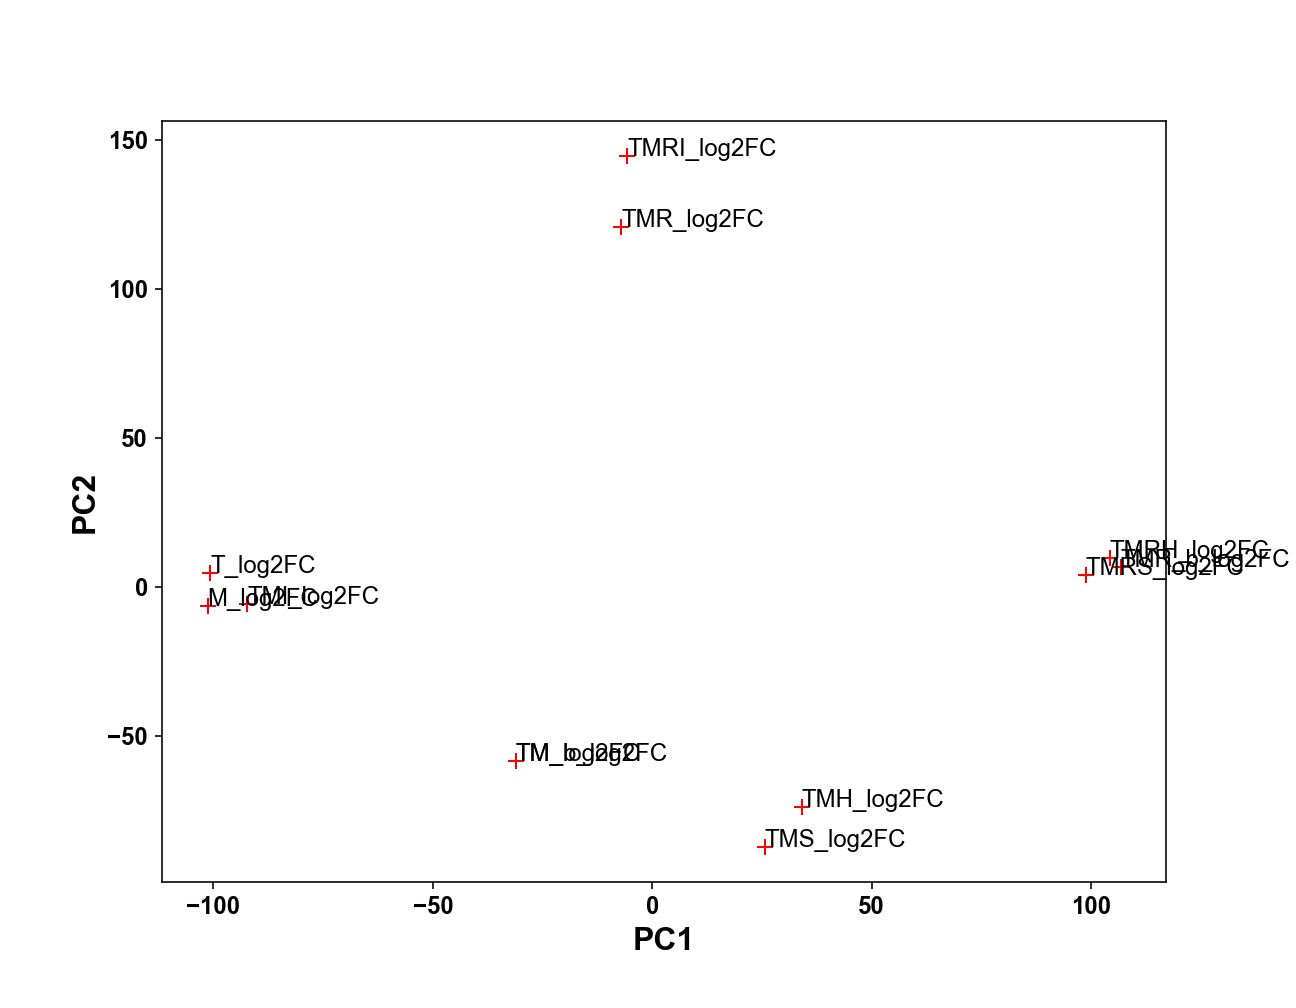

In [13]:
# plotting PCA

fig = plt.figure(figsize=(9,7))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'normal', 'size' : 12} 
plt.rc('font', **fontAxes)

ax.plot(PCA_pert.iloc[:,0],PCA_pert.iloc[:,1],'+',color='red',ms=8) 

ax.set_xlabel('PC1',**fontLabel)
ax.set_ylabel('PC2',**fontLabel)
#ax.set_zlabel('PC3',**fontLabel)

for smpl in PCA_pert.index:
    ax.annotate(smpl,(PCA_pert.loc[smpl][0],PCA_pert.loc[smpl][1]))

#ax.legend(numpoints=1,prop=fontLabel)
plt.show()

# T_2 is clearly an outlier

<IPython.core.display.Javascript object>


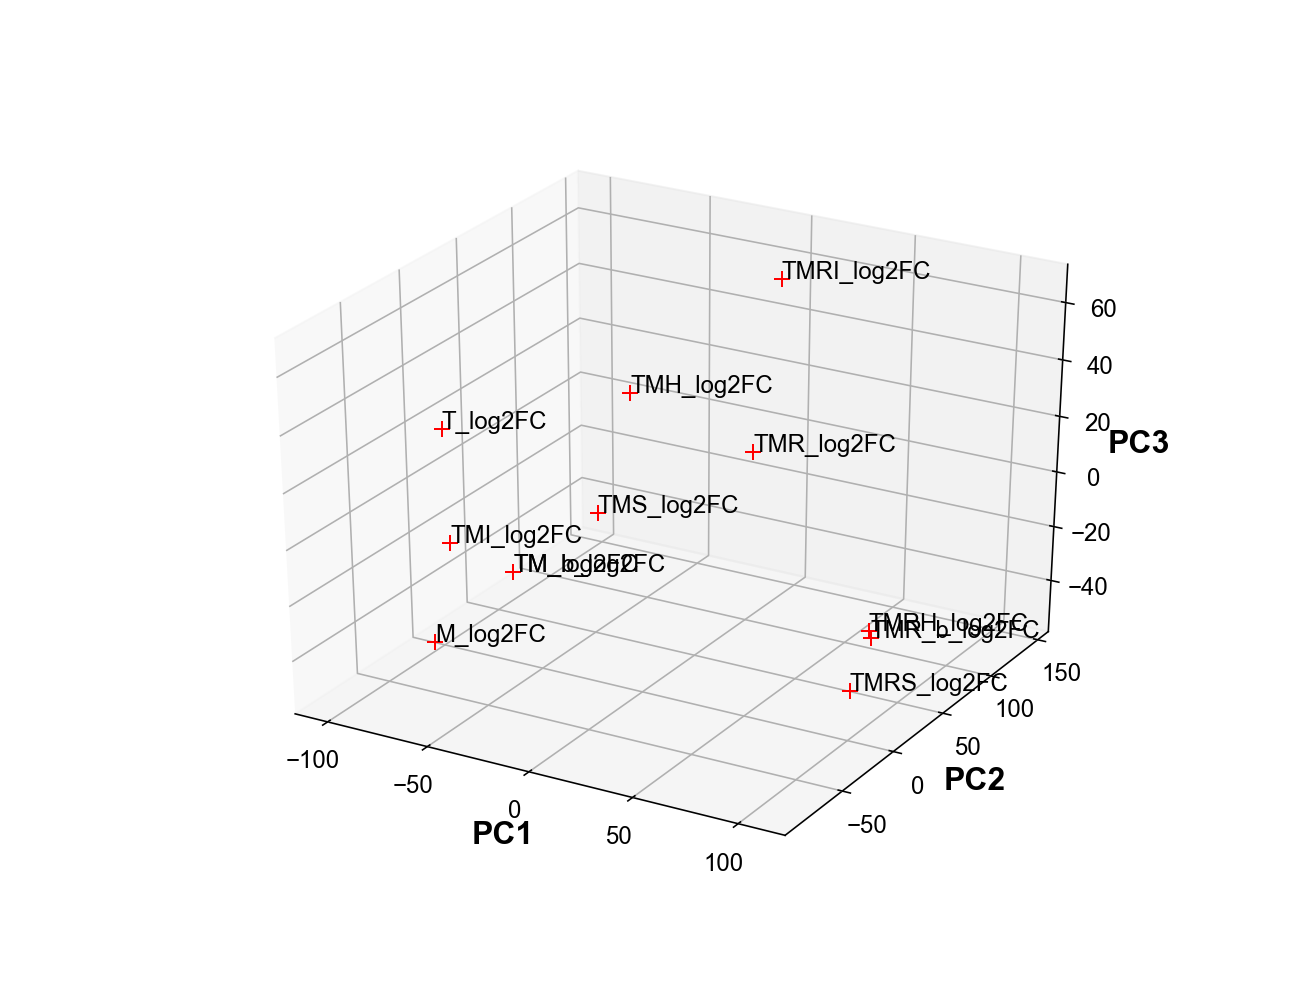

In [14]:
# plotting 3D PCA

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'normal', 'size' : 12} 
plt.rc('font', **fontAxes)

ax.plot3D(PCA_pert.iloc[:,0],PCA_pert.iloc[:,1],PCA_pert.iloc[:,2],'+',color='red',ms=8) 

ax.set_xlabel('PC1',**fontLabel)
ax.set_ylabel('PC2',**fontLabel)
ax.set_zlabel('PC3',**fontLabel)

for smpl in PCA_pert.index:
    ax.text(PCA_pert.loc[smpl][0],PCA_pert.loc[smpl][1],PCA_pert.loc[smpl][2],smpl)

#ax.legend(numpoints=1,prop=fontLabel)
plt.show()

# two more outliers here

<IPython.core.display.Javascript object>


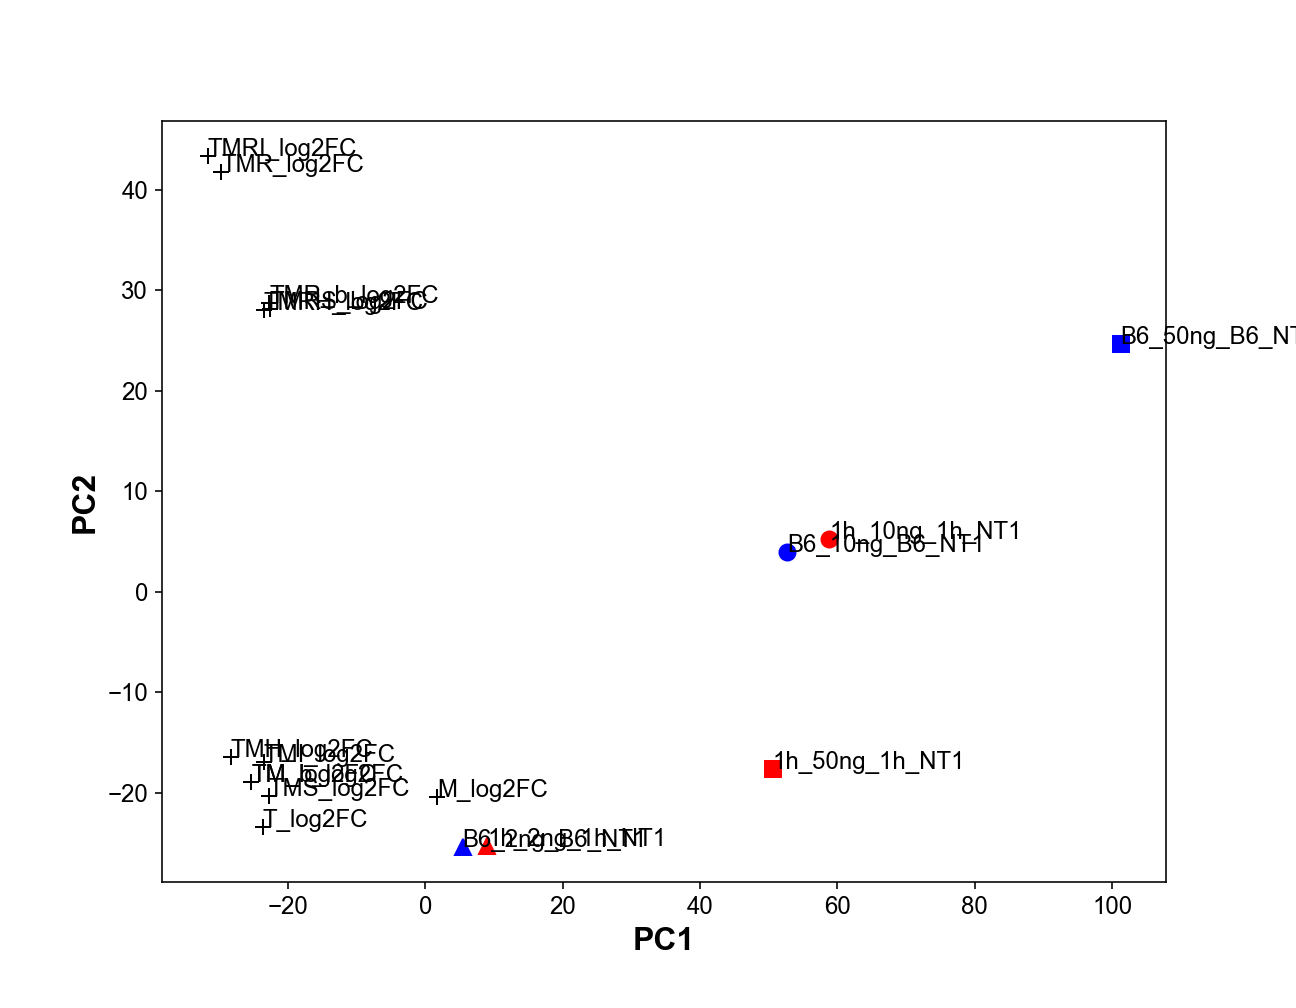

In [17]:
# plotting PCA for shared genes in pert and WTvsMut datasets

fig = plt.figure(figsize=(9,7))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'normal', 'size' : 12} 
plt.rc('font', **fontAxes)



ax.plot(PCA_total_dataset_com.filter(regex='B6_2ng',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='B6_2ng',axis=0).iloc[:,1],'^',color='blue',label='WT, 2 ng TNF',ms=8) 
ax.plot(PCA_total_dataset_com.filter(regex='B6_10ng',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='B6_10ng',axis=0).iloc[:,1],'o',color='blue',label='WT, 10 ng TNF',ms=8) 
ax.plot(PCA_total_dataset_com.filter(regex='B6_50ng',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='B6_50ng',axis=0).iloc[:,1],'s',color='blue',label='WT, 50 ng TNF',ms=8) 

ax.plot(PCA_total_dataset_com.filter(regex='1h_2ng',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='1h_2ng',axis=0).iloc[:,1],'^',color='red',label='mut, 2 ng TNF',ms=8) 
ax.plot(PCA_total_dataset_com.filter(regex='1h_10ng',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='1h_10ng',axis=0).iloc[:,1],'o',color='red',label='mut, 10 ng TNF',ms=8) 
ax.plot(PCA_total_dataset_com.filter(regex='1h_50ng',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='1h_50ng',axis=0).iloc[:,1],'s',color='red',label='mut, 50 ng TNF',ms=8) 



ax.plot(PCA_total_dataset_com.filter(regex='T_log2FC',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='T_log2FC',axis=0).iloc[:,1],'+',color='black',label='T_log2FC',ms=8) 
ax.plot(PCA_total_dataset_com.filter(regex='M_log2FC',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='M_log2FC',axis=0).iloc[:,1],'+',color='black',label='M_log2FC',ms=8) 
ax.plot(PCA_total_dataset_com.filter(regex='TM_log2FC',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='TM_log2FC',axis=0).iloc[:,1],'+',color='black',label='TM_log2FC',ms=8) 
ax.plot(PCA_total_dataset_com.filter(regex='TMR_log2FC',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='TMR_log2FC',axis=0).iloc[:,1],'+',color='black',label='TMR_log2FC',ms=8) 
ax.plot(PCA_total_dataset_com.filter(regex='TMI_log2FC',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='TMI_log2FC',axis=0).iloc[:,1],'+',color='black',label='TMI_log2FC',ms=8) 
ax.plot(PCA_total_dataset_com.filter(regex='TMRI_log2FC',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='TMRI_log2FC',axis=0).iloc[:,1],'+',color='black',label='TMRI_log2FC',ms=8) 
ax.plot(PCA_total_dataset_com.filter(regex='TM_b_log2FC',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='TM_b_log2FC',axis=0).iloc[:,1],'+',color='black',label='TM_b_log2FC',ms=8) 
ax.plot(PCA_total_dataset_com.filter(regex='TMR_b_log2FC',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='TMR_b_log2FC',axis=0).iloc[:,1],'+',color='black',label='TMR_b_log2FC',ms=8) 
ax.plot(PCA_total_dataset_com.filter(regex='TMS_log2FC',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='TMS_log2FC',axis=0).iloc[:,1],'+',color='black',label='TMS_log2FC',ms=8) 
ax.plot(PCA_total_dataset_com.filter(regex='TMH_log2FC',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='TMH_log2FC',axis=0).iloc[:,1],'+',color='black',label='TMH_log2FC',ms=8) 
ax.plot(PCA_total_dataset_com.filter(regex='TMRS_log2FC',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='TMRS_log2FC',axis=0).iloc[:,1],'+',color='black',label='TMRS_log2FC',ms=8) 
ax.plot(PCA_total_dataset_com.filter(regex='TMRH_log2FC',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='TMRH_log2FC',axis=0).iloc[:,1],'+',color='black',label='TMRH_log2FC',ms=8) 

ax.set_xlabel('PC1',**fontLabel)
ax.set_ylabel('PC2',**fontLabel)


for smpl in PCA_total_dataset_com.index:
    ax.annotate(smpl,(PCA_total_dataset_com.loc[smpl][0],PCA_total_dataset_com.loc[smpl][1]))


#ax.legend(numpoints=1,prop=fontLabel)
plt.show()

Explained variances by components:  [0.57403058 0.17716764 0.16312816] total variance explained:  0.9143263883034511


<IPython.core.display.Javascript object>


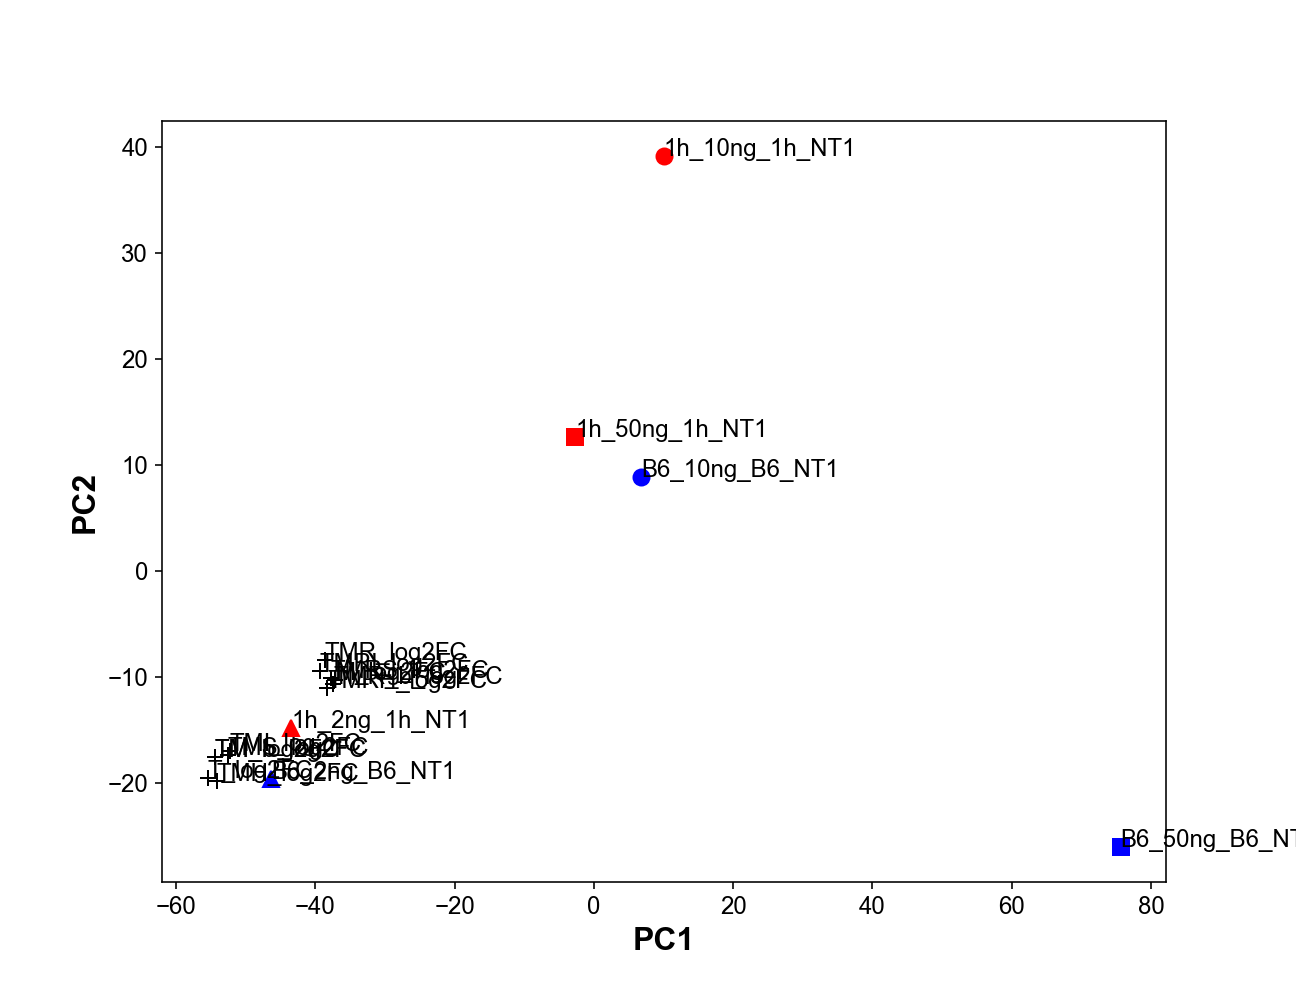

In [18]:
# Now using controls to generate PCA coeffs and running PCA tranfrom on all data

# running PCA
pca = PCA(n_components=3)
pca.fit(dataset_com.filter(regex='ng.*NT1').transpose())
Spca = pca.transform(dataset_com.transpose())
#PCAweights = pca.components_.transpose()
print("Explained variances by components: ", pca.explained_variance_ratio_, "total variance explained: ",sum(pca.explained_variance_ratio_))
PCA_total_dataset_com = pd.DataFrame(Spca,columns=['PC1','PC2','PC3'],index=dataset_com.columns)
PCA_total_dataset_com

# plotting PCA for shared genes in pert and WTvsMut datasets

fig = plt.figure(figsize=(9,7))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'normal', 'size' : 12} 
plt.rc('font', **fontAxes)



ax.plot(PCA_total_dataset_com.filter(regex='B6_2ng',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='B6_2ng',axis=0).iloc[:,1],'^',color='blue',label='WT, 2 ng TNF',ms=8) 
ax.plot(PCA_total_dataset_com.filter(regex='B6_10ng',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='B6_10ng',axis=0).iloc[:,1],'o',color='blue',label='WT, 10 ng TNF',ms=8) 
ax.plot(PCA_total_dataset_com.filter(regex='B6_50ng',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='B6_50ng',axis=0).iloc[:,1],'s',color='blue',label='WT, 50 ng TNF',ms=8) 

ax.plot(PCA_total_dataset_com.filter(regex='1h_2ng',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='1h_2ng',axis=0).iloc[:,1],'^',color='red',label='mut, 2 ng TNF',ms=8) 
ax.plot(PCA_total_dataset_com.filter(regex='1h_10ng',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='1h_10ng',axis=0).iloc[:,1],'o',color='red',label='mut, 10 ng TNF',ms=8) 
ax.plot(PCA_total_dataset_com.filter(regex='1h_50ng',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='1h_50ng',axis=0).iloc[:,1],'s',color='red',label='mut, 50 ng TNF',ms=8) 



ax.plot(PCA_total_dataset_com.filter(regex='T_log2FC',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='T_log2FC',axis=0).iloc[:,1],'+',color='black',label='T_log2FC',ms=8) 
ax.plot(PCA_total_dataset_com.filter(regex='M_log2FC',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='M_log2FC',axis=0).iloc[:,1],'+',color='black',label='M_log2FC',ms=8) 
ax.plot(PCA_total_dataset_com.filter(regex='TM_log2FC',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='TM_log2FC',axis=0).iloc[:,1],'+',color='black',label='TM_log2FC',ms=8) 
ax.plot(PCA_total_dataset_com.filter(regex='TMR_log2FC',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='TMR_log2FC',axis=0).iloc[:,1],'+',color='black',label='TMR_log2FC',ms=8) 
ax.plot(PCA_total_dataset_com.filter(regex='TMI_log2FC',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='TMI_log2FC',axis=0).iloc[:,1],'+',color='black',label='TMI_log2FC',ms=8) 
ax.plot(PCA_total_dataset_com.filter(regex='TMRI_log2FC',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='TMRI_log2FC',axis=0).iloc[:,1],'+',color='black',label='TMRI_log2FC',ms=8) 
ax.plot(PCA_total_dataset_com.filter(regex='TM_b_log2FC',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='TM_b_log2FC',axis=0).iloc[:,1],'+',color='black',label='TM_b_log2FC',ms=8) 
ax.plot(PCA_total_dataset_com.filter(regex='TMR_b_log2FC',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='TMR_b_log2FC',axis=0).iloc[:,1],'+',color='black',label='TMR_b_log2FC',ms=8) 
ax.plot(PCA_total_dataset_com.filter(regex='TMS_log2FC',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='TMS_log2FC',axis=0).iloc[:,1],'+',color='black',label='TMS_log2FC',ms=8) 
ax.plot(PCA_total_dataset_com.filter(regex='TMH_log2FC',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='TMH_log2FC',axis=0).iloc[:,1],'+',color='black',label='TMH_log2FC',ms=8) 
ax.plot(PCA_total_dataset_com.filter(regex='TMRS_log2FC',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='TMRS_log2FC',axis=0).iloc[:,1],'+',color='black',label='TMRS_log2FC',ms=8) 
ax.plot(PCA_total_dataset_com.filter(regex='TMRH_log2FC',axis=0).iloc[:,0],PCA_total_dataset_com.filter(regex='TMRH_log2FC',axis=0).iloc[:,1],'+',color='black',label='TMRH_log2FC',ms=8) 

ax.set_xlabel('PC1',**fontLabel)
ax.set_ylabel('PC2',**fontLabel)


for smpl in PCA_total_dataset_com.index:
    ax.annotate(smpl,(PCA_total_dataset_com.loc[smpl][0],PCA_total_dataset_com.loc[smpl][1]))


#ax.legend(numpoints=1,prop=fontLabel)
plt.show()

In [22]:
#calculating perturbation vector by subtracting from perturbed vector the initial one

x = total_dataset_com['TMR_log2FC - TM_log2FC'] = total_dataset_com.apply(lambda x: x['TMR_log2FC'] - x['TM_log2FC'], axis=1)
x = total_dataset_com['TMR_b_log2FC - TM_b_log2FC'] = total_dataset_com.apply(lambda x: x['TMR_b_log2FC'] - x['TM_b_log2FC'], axis=1)
x = total_dataset_com['TMI_log2FC - TM_log2FC'] = total_dataset_com.apply(lambda x: x['TMI_log2FC'] - x['TM_log2FC'], axis=1)
x = total_dataset_com['TMRI_log2FC - TM_log2FC'] = total_dataset_com.apply(lambda x: x['TMRI_log2FC'] - x['TM_log2FC'], axis=1)
x = total_dataset_com['TMH_log2FC - TM_b_log2FC'] = total_dataset_com.apply(lambda x: x['TMH_log2FC'] - x['TM_b_log2FC'], axis=1)
x = total_dataset_com['TMS_log2FC - TM_b_log2FC'] = total_dataset_com.apply(lambda x: x['TMS_log2FC'] - x['TM_b_log2FC'], axis=1)
x = total_dataset_com['TMRH_log2FC - TM_b_log2FC'] = total_dataset_com.apply(lambda x: x['TMRH_log2FC'] - x['TM_b_log2FC'], axis=1)
x = total_dataset_com['TMRS_log2FC - TM_b_log2FC'] = total_dataset_com.apply(lambda x: x['TMRS_log2FC'] - x['TM_b_log2FC'], axis=1)

total_dataset_com

,norm_vec,B6_2ng_B6_NT1,B6_10ng_B6_NT1,B6_50ng_B6_NT1,1h_2ng_1h_NT1,1h_10ng_1h_NT1,1h_50ng_1h_NT1,T_log2FC,M_log2FC,TM_log2FC,...,TMRS_log2FC,TMRH_log2FC,TMR_log2FC - TM_log2FC,TMR_b_log2FC - TM_b_log2FC,TMI_log2FC - TM_log2FC,TMRI_log2FC - TM_log2FC,TMH_log2FC - TM_b_log2FC,TMS_log2FC - TM_b_log2FC,TMRH_log2FC - TM_b_log2FC,TMRS_log2FC - TM_b_log2FC
gene,,,,,,,,,,,,,,,,,,,,,
Elf4,0.001147,0.00000,0.000000,0.937197,0.000000,0.000000,0.000000,-0.059926,0.171525,-0.151742,...,0.358908,0.352361,0.364990,0.575810,0.029105,0.395501,0.017248,0.059790,0.504103,0.510650
Ctc1,-0.001936,0.00000,0.000000,-1.581880,0.000000,0.000000,0.000000,0.103914,0.126011,0.168818,...,0.020180,-0.073166,-0.003291,-0.102218,0.041701,-0.111164,0.072313,0.020331,-0.241985,-0.148638
Susd6,0.002300,0.00000,0.000000,1.879300,0.000000,0.000000,0.000000,0.154996,0.330904,0.083316,...,0.429136,0.405157,0.416374,0.357099,0.076933,0.295727,0.005911,0.037831,0.321841,0.345820
Pde7b,0.001921,0.00000,0.000000,1.569720,0.000000,0.000000,0.000000,0.153330,0.836012,0.183086,...,0.003679,-0.024987,-0.571971,-0.226606,0.033833,-0.640709,0.052587,0.069706,-0.208074,-0.179407
Adar,0.002352,0.00000,1.927130,3.152990,0.000000,2.697780,2.745110,0.109296,1.216017,0.318924,...,0.853963,0.761483,0.488272,0.541205,0.062081,0.450297,-0.081339,0.118699,0.442559,0.535039
Fibp,0.004319,0.00000,0.820063,0.000000,0.000000,0.000000,0.000000,0.003387,0.154324,0.181309,...,0.251074,0.157203,-0.124926,-0.060193,-0.162743,-0.065227,-0.023937,-0.055878,-0.024106,0.069765
Trappc10,0.002069,0.00000,0.000000,1.690130,0.000000,0.000000,0.000000,-0.137108,-0.125200,-0.149601,...,-0.054501,-0.010169,0.203540,0.105212,0.030609,0.221420,0.153413,0.085876,0.139432,0.095100
Rcbtb2,-0.008520,0.00000,-2.752710,-4.045530,0.000000,-2.715310,0.000000,-0.875309,-0.616803,-1.020884,...,-2.324588,-2.211130,-1.145358,-1.247326,0.061423,-1.253879,-0.101737,0.067765,-1.190247,-1.303704
Tbc1d12,-0.003002,0.00000,-1.119080,-1.092470,0.000000,-1.050530,0.000000,-0.136337,-0.425152,-0.172446,...,-0.839758,-0.650299,-0.847586,-0.633595,0.045123,-0.784086,-0.045562,0.210146,-0.477853,-0.667311


In [27]:
#create new dataframe of gene contributions
genecont = total_dataset_com[['TMR_TM_NV','TMR_b_TM_b_NV','TMI_TM_NV','TMRI_TM_NV','TMH_TM_b_NV','TMS_TM_v_NV','TMRH_TM_b_NV','TMRS_TM_b_NV']]
genecont.to_csv('genecontributions.csv')
genecont.sort_values(by='TMR_TM_NV')
#genecont.loc['Myc']

,TMR_TM_NV,TMR_b_TM_b_NV,TMI_TM_NV,TMRI_TM_NV,TMH_TM_b_NV,TMS_TM_v_NV,TMRH_TM_b_NV,TMRS_TM_b_NV
gene,,,,,,,,
Oasl1,-0.338893,-0.301596,-0.054144,-0.273940,0.020907,-0.064879,-0.250251,-0.311531
Gm38386,-0.229048,-0.370134,0.012311,-0.355161,-0.009302,-0.002342,-0.158483,-0.129468
Ms4a4c,-0.179537,-0.099598,-0.026944,-0.102357,0.064205,-0.015857,-0.088233,-0.121854
Mgam,-0.165071,-0.020506,-0.110611,-0.210698,-0.025382,0.001868,0.074246,-0.068302
Ptges,-0.161984,-0.161893,0.020118,-0.150569,-0.013156,0.001478,-0.170053,-0.159592
Mirt1,-0.155034,-0.154790,0.005741,-0.209905,0.005359,-0.005894,-0.152911,-0.112967
Hspa1a,-0.153216,-0.191900,-0.024814,-0.176097,-0.001864,0.007945,-0.200241,-0.202446
Vwf,-0.142724,-0.127427,-0.011789,-0.151327,0.009209,0.001856,-0.125699,-0.127033
Hspa1b,-0.138927,-0.155527,-0.006056,-0.131989,-0.010445,-0.028264,-0.143839,-0.154680
